### Stock Market Prediction And Forecasting Using Stacked LSTM

In [44]:
### Keras and Tensorflow >2.0
import tensorflow as tf
from keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

In [45]:
df=pd.read_csv('bhel.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Return,Change,Volatility,MA7,MA21,Momentum,MACD,Signal,Upper_band,Lower_band
0,2017-02-21,104.466667,102.066666,102.666664,103.066666,5097706.0,94.434799,0.004,0.766663,5.967566,102.800000,97.625397,99.233330,4.046455,4.068695,110.611576,84.639217
1,2017-02-22,105.266663,102.599998,103.933334,102.866669,9082795.0,94.251541,-0.010,-0.199997,5.830396,102.719048,98.450794,99.233330,3.885545,4.032065,110.368430,86.533157
2,2017-02-23,103.833336,101.666664,102.833336,102.300003,13964640.0,93.732346,-0.005,-0.566666,5.670885,102.342857,99.139683,99.300003,3.669993,3.959651,110.114840,88.164525
3,2017-02-27,103.266663,101.233330,102.000000,101.866669,4069939.0,93.335289,-0.001,-0.433334,5.502658,102.409524,99.803175,100.066666,3.424722,3.852665,109.548737,90.057612
4,2017-02-28,109.199997,101.533333,101.533333,108.300003,16553127.0,99.229836,0.067,6.433334,5.742256,103.276192,100.528572,99.866669,3.706730,3.823478,110.434583,90.622561


In [46]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Return,Change,Volatility,MA7,MA21,Momentum,MACD,Signal,Upper_band,Lower_band
1211,2022-01-17,64.599998,63.549999,64.050003,63.849998,24887809.0,63.849998,-0.003,0.149998,3.685784,62.378572,59.809524,59.349998,0.454668,-0.221367,64.335407,55.283640
1212,2022-01-18,64.099998,60.349998,64.000000,60.650002,36833735.0,60.650002,-0.052,-3.199997,3.607062,62.542858,59.983333,59.700001,0.334283,-0.110237,64.332970,55.633697
1213,2022-01-19,62.000000,60.000000,60.750000,61.849998,24114802.0,61.849998,0.018,1.199997,3.524545,62.428571,60.200000,60.700001,0.331882,-0.021814,64.440165,55.959835
1214,2022-01-20,62.299999,61.099998,62.000000,61.700001,16346200.0,61.700001,-0.005,-0.149998,3.443568,62.400000,60.357143,60.849998,0.314252,0.045400,64.561580,56.152706
1215,2022-01-21,62.250000,58.549999,61.400002,60.099998,26622044.0,60.099998,-0.021,-1.600002,3.379403,62.078571,60.416667,57.650002,0.169224,0.070164,64.566526,56.266807


In [47]:
df1 = df.reset_index()['Close']

In [48]:
df1

0       103.066666
1       102.866669
2       102.300003
3       101.866669
4       108.300003
           ...    
1211     63.849998
1212     60.650002
1213     61.849998
1214     61.700001
1215     60.099998
Name: Close, Length: 1216, dtype: float64

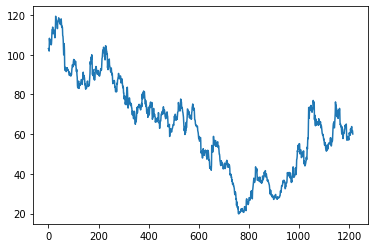

In [49]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [50]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [51]:
import numpy as np

In [52]:
df1

0       103.066666
1       102.866669
2       102.300003
3       101.866669
4       108.300003
           ...    
1211     63.849998
1212     60.650002
1213     61.849998
1214     61.700001
1215     60.099998
Name: Close, Length: 1216, dtype: float64

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [54]:
print(df1)

[[0.83592832]
 [0.83391931]
 [0.82822704]
 ...
 [0.42189852]
 [0.42039176]
 [0.40431941]]


In [55]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [56]:
training_size,test_size

(790, 426)

In [57]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [58]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [59]:
print(X_train.shape), print(y_train.shape)

(689, 100)
(689,)


(None, None)

In [60]:
print(X_test.shape), print(ytest.shape)

(325, 100)
(325,)


(None, None)

In [61]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [62]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [63]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 9s 337ms/step - loss: 0.0723 - val_loss: 0.0053
Epoch 2/100
11/11 [==============================] - 2s 222ms/step - loss: 0.0137 - val_loss: 0.0119
Epoch 3/100
11/11 [==============================] - 2s 222ms/step - loss: 0.0077 - val_loss: 0.0038
Epoch 4/100
11/11 [==============================] - 2s 214ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 5/100
11/11 [==============================] - 2s 211ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 6/100
11/11 [==============================] - 2s 215ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 7/100
11/11 [==============================] - 2s 214ms/step - loss: 0.0022 - val_loss: 0.0043
Epoch 8/100
11/11 [==============================] - 2s 219ms/step - loss: 0.0021 - val_loss: 0.0044
Epoch 9/100
11/11 [==============================] - 2s 215ms/step - loss: 0.0022 - val_loss: 0.0044
Epoch 10/100
11/11 [==============================] - 2s 216ms/step - loss: 0.0022 - val_lo

In [66]:
model.save('bhel.h5')

In [67]:
import tensorflow as tf
from keras.models import load_model

In [68]:
tf.__version__

'2.7.0'

In [69]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [70]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [71]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

70.85615200104968

In [72]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

53.37883246953249

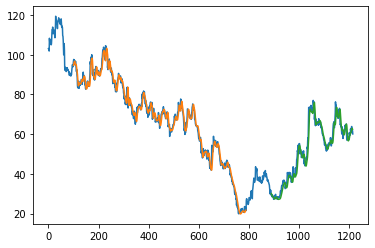

In [73]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [74]:
len(test_data)

426

In [75]:
x_input=test_data[325:].reshape(1,-1)
x_input.shape


(1, 101)

In [76]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [77]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

In [78]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [79]:
import matplotlib.pyplot as plt

In [80]:
len(df1)

1216

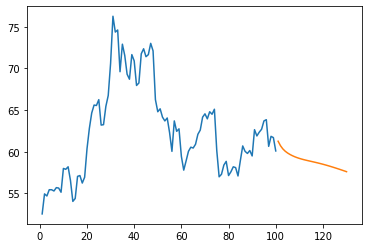

In [81]:
plt.plot(day_new,scaler.inverse_transform(df1[1116:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

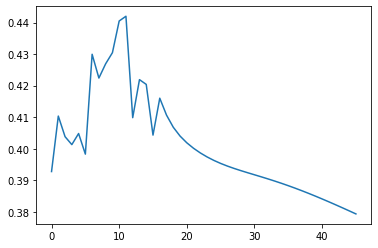

In [82]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [83]:
df3=scaler.inverse_transform(df3).tolist()

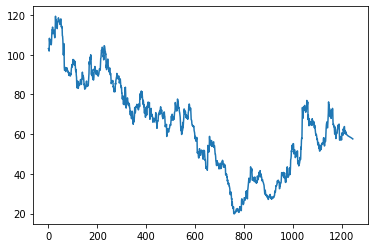

In [84]:
plt.plot(df3)

In [85]:
def predict(stockName):
  df=pd.read_csv(stockName + '.csv')
  df.head()

  df1 = df.reset_index()['Close']

  model = load_model(stockName + '.h5')

  scaler=MinMaxScaler(feature_range=(0,1))
  df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

  training_size=int(len(df1)*0.65)
  test_size=len(df1)-training_size
  train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

  time_step = 100
  X_train, y_train = create_dataset(train_data, time_step)
  X_test, ytest = create_dataset(test_data, time_step)

  X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
  X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

  train_predict=model.predict(X_train)
  test_predict=model.predict(X_test)

  train_predict=scaler.inverse_transform(train_predict)
  test_predict=scaler.inverse_transform(test_predict)

  testAccuracy = 100 - (math.sqrt(mean_squared_error(ytest,test_predict))/100)
  trainAccuracy = 100 - (math.sqrt(mean_squared_error(y_train,train_predict))/100)

  print ("Train Accuracy = ", trainAccuracy, "%")
  print ("Test Accuracy = ", testAccuracy, "%\n")

  look_back=100
  trainPredictPlot = np.empty_like(df1)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
  # shift test predictions for plotting
  testPredictPlot = np.empty_like(df1)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
  # plot baseline and predictions
  plt.plot(scaler.inverse_transform(df1), color = "lightblue", label = "All Values")
  plt.plot(trainPredictPlot, color = "darkgreen", label = "Train Predicted")
  plt.plot(testPredictPlot, color = "orange", label = "Test Values")
  plt.xlabel("Days")
  plt.ylabel("Cost of share (in INR)")
  plt.legend()
  plt.show()

  x_input=test_data[325:].reshape(1,-1)
  x_input.shape

  temp_input=list(x_input)
  temp_input=temp_input[0].tolist()

  lst_output=[]
  n_steps=100
  i=0
  while(i<30):
      
      if(len(temp_input)>100):
          #print(temp_input)
          x_input=np.array(temp_input[1:])
          #print("{} day input {}".format(i,x_input))
          x_input=x_input.reshape(1,-1)
          x_input = x_input.reshape((1, n_steps, 1))
          #print(x_input)
          yhat = model.predict(x_input, verbose=0)
          #print("{} day output {}".format(i,yhat))
          temp_input.extend(yhat[0].tolist())
          temp_input=temp_input[1:]
          #print(temp_input)
          lst_output.extend(yhat.tolist())
          i=i+1
      else:
          x_input = x_input.reshape((1, n_steps,1))
          yhat = model.predict(x_input, verbose=0)
          #print(yhat[0])
          temp_input.extend(yhat[0].tolist())
          #print(len(temp_input))
          lst_output.extend(yhat.tolist())
          i=i+1

  day_new=np.arange(1,101)
  day_pred=np.arange(101,131)

  print("\n")
  plt.plot(day_new,scaler.inverse_transform(df1[1116:]), label = "last 100 days")
  plt.plot(day_pred,scaler.inverse_transform(lst_output), label = "predicted 30 days")
  plt.xlabel("Days")
  plt.ylabel("Cost of share (in INR)")
  plt.legend()

Train Accuracy =  99.29143847998951 %
Test Accuracy =  99.46621167530468 %



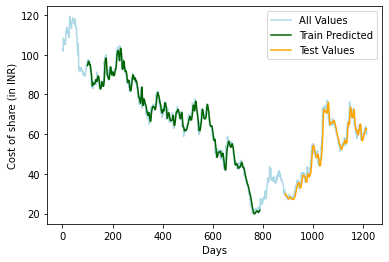

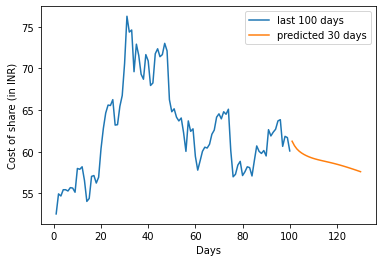

In [86]:
predict("bhel")